# Problemas con valores en la frontera
### El método de disparo lineal para resolver el problema de valores de frontera en el caso lineal.



# Introducción 

El método de disparo lineal es una técnica numérica utilizada para resolver problemas de valor de frontera (también conocidos como problemas de contorno) en ecuaciones diferenciales ordinarias de segundo orden. Estos problemas suelen involucrar una ecuación diferencial de segundo orden, condiciones de contorno en dos puntos distintos y, a menudo, un valor inicial.

La idea básica detrás del método de disparo lineal es convertir el problema de valor de frontera en un problema de valor inicial. Esto se hace introduciendo un parámetro adicional, comúnmente llamado "parámetro de disparo", que permite ajustar las condiciones iniciales de tal manera que las soluciones converjan a las condiciones de contorno deseadas.

Para entender el método de disparo lineal, primero consideremos una ecuación diferencial de segundo orden de la forma:
$$
\begin{align*}
    y''(x) = p(x)y' + q(x)y + r(x)
\end{align*}
$$
sujeta a ciertas condiciones de frontera, por ejemplo : 
$$
\begin{align*}
    &y(a) = \alpha \\
    &y(b) = \beta \\
\end{align*}
$$

Donde a y b son los extremos del intervalo en el que se resuelve la ecuación diferencial, y  $\alpha$ y $ \beta$ son los valores conocidos de la función en esos extremos.

El método de disparo lineal consiste en convertir el problema de valor de frontera de segundo orden en un problema de valor inicial de primer orden. Para hacer esto, introducimos una variable ficticia, digamos 
, y transformamos la ecuación diferencial de segundo orden en dos ecuaciones de primer orden como sigue: 
$$
\begin{align*}
   y''_1 = p(x)y'_1 + q(x)y_1 + r(x)  \qquad a\leq x\leq b \\ \\
   y''_2 = p(x)y'_2 + q(x)y_2 + r(x)  \qquad a\leq x\leq b
\end{align*}
$$
sujeta a las mismas condiciones iniciales : 
$$
\begin{align*}
    &y_1(a) = \alpha \\
    &y_1'(a) = 0 \\ \\
     &y_2(a) = 0 \\
    &y_2'(a) = 1 \\
\end{align*}
$$
Ahora, podemos resolver este sistema de ecuaciones de valor inicial usando un método numérico estándar como el método de Euler o el método de Runge-Kutta.


Recopilado de : El método de disparo para problemas lineales de frontera. (n.d.). Retrieved May 3, 2024, from https://esfm.egormaximenko.com/numer/shooting_method_for_linear_boundary_value_problems_es.pdf

‌

### Ejemplo 1
Aproxime la solución del siguiente problema de valor en la frontera


$$
\begin{align*}
    &y''=2y'+3y-6, \\ 
    &y(0)=3, \\ 
    &y(1)= e^{3}+2
\end{align*}
$$

El siguiente programa da una aproximación de la solución $ y(t)$ usando Euler para aproximar la solución de los sistemas generados.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, t_span, y0, h):

    t0, tf = t_span
    t = np.arange(t0, tf + h, h)
    n = len(t)
    m = len(y0)
    y = np.zeros((n, m))
    y[0] = y0

    for i in range(1, n):
        y[i] = y[i-1] + h * np.array(f(y[i-1], t[i-1]))

    return y, t

In [2]:
# Define las funciones del sistema de EDOs
def system1(u, t):
    u1, u2 = u
    return [u2, 2*u2 + 3*u1 - 6]

def system2(w, t):
    w1, w2 = w
    return [w2, 2*w2 + 3*w1]

# Función para resolver los sistemas
def solve_systems(system1, system2, u0, w0, t_span, h):
    # Aproxima la solución del sistema 1 usando Euler
    u_e, t = euler_method(system1, t_span, u0, h)

    # Aproxima la solución del sistema 2 usando Euler
    w_e, _ = euler_method(system2, t_span, w0, h)
    
    return u_e, w_e, t

# Función para calcular la solución de y_s usando las soluciones de u_s y w_s
def calculate_y_solution(u_s, w_s, y_b):
    # Calcula la solución aproximada de y_s
    y_s = np.zeros(len(u_s))
    for i in range(len(u_s)):
        y_s[i] = u_s[i] + (((y_b - u_s[-1]) / w_s[-1])) * w_s[i]
    return y_s

# Función para graficar los resultados
def plot_results(u_e, w_e, t, y_s):
    # Graficas de las aproximaciones de la solución
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.plot(t, u_e[:, 0], label='u1(t)')
    plt.xlabel('Time')
    plt.ylabel('u1')
    plt.title('Solution for u1(t) using Euler method')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(t, u_e[:, 1], label='u2(t)')
    plt.xlabel('Time')
    plt.ylabel('u2')
    plt.title('Solution for u2(t) using Euler method')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(t, w_e[:, 0], label='w1(t)')
    plt.xlabel('Time')
    plt.ylabel('w1')
    plt.title('Solution for w1(t) using Euler method')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(t, w_e[:, 1], label='w2(t)')
    plt.xlabel('Time')
    plt.ylabel('w2')
    plt.title('Solution for w2(t) using Euler method')
    plt.legend()

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 2)
    plt.plot(t, y_s, label='y(t)')
    plt.xlabel('Time')
    plt.ylabel('y')
    plt.title('Solution for y(t) using Euler method')
    plt.legend()
    plt.tight_layout()
    plt.show()


Solucion de : 
$$
\begin{align*}
    &y''=2y'+3y-6, \\ 
    &y(0)=3, \\ 
    &y(1)= e^{3}+2
\end{align*}
$$
usando el metodo de Euler.


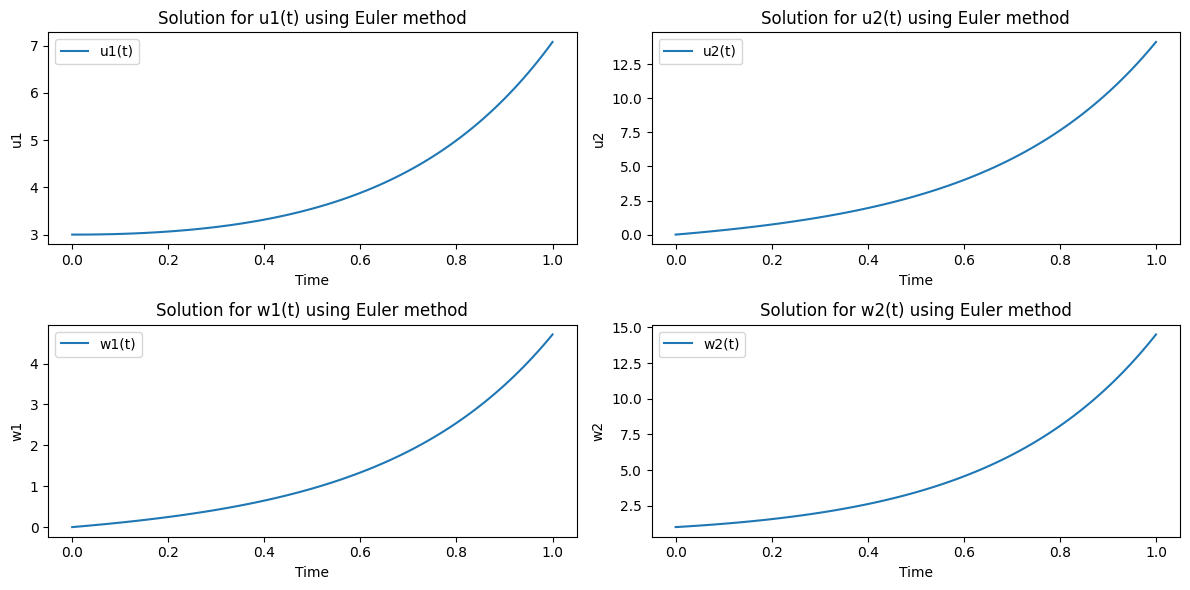

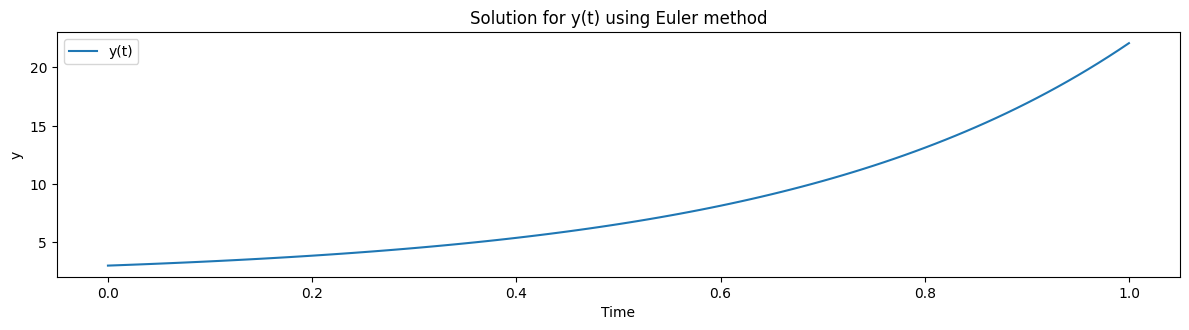

In [3]:
# Define las condiciones iniciales
u0 = [3, 0]
w0 = [0, 1]
t_span = [0, 1]  # intervalo de tiempo
h = 0.01  # Tamaño de paso
y_b = np.exp(3) + 2  # Valor en la frontera

# Resolver los sistemas
u_e, w_e, t = solve_systems(system1, system2, u0, w0, t_span, h)

# Calcular la solución de y_s
y_s = calculate_y_solution(u_e[:, 0], w_e[:, 0], y_b)

# Graficar los resultados
plot_results(u_e, w_e, t, y_s)

## Ejemplo 2
Aproxime la solución del siguiente problema de valor en la frontera
$$
\begin{align*}
    &y''=2y'+3y-6, \\ 
    &y(0)=3, \\ 
    &y(1)= e^{3}+2
\end{align*}
$$
El siguiente programa da una aproximación de la solución  $y(t)$ usandoRunge kutta para aproximar la solución de los sistemas generados.

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta_order_4(f, t_span, y0, h):
    t0, tf = t_span
    t = np.arange(t0, tf + h, h)
    n = len(t)
    m = len(y0)
    y = np.zeros((n, m))
    y[0] = y0

    for i in range(1, n):
        k1 = h * np.array(f(y[i-1], t[i-1]))
        k2 = h * np.array(f(y[i-1] + 0.5 * k1, t[i-1] + 0.5 * h))
        k3 = h * np.array(f(y[i-1] + 0.5 * k2, t[i-1] + 0.5 * h))
        k4 = h * np.array(f(y[i-1] + k3, t[i-1] + h))
        y[i] = y[i-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return y, t

In [5]:
def system1(u, t):
    u1, u2 = u
    return [u2, 2*u2 + 3*u1 - 6]

def system2(w, t):
    w1, w2 = w
    return [w2, 2*w2 + 3*w1]

In [6]:
def solve_systems(system1, system2, u0, w0, t_span, h, y_b):
    u_solution, t = runge_kutta_order_4(system1, t_span, u0, h)
    w_solution, _ = runge_kutta_order_4(system2, t_span, w0, h)

    ur_s = u_solution[:, 0]
    wr_s = w_solution[:, 0]
    yr_s = np.zeros(len(w_solution))

    for i in range(len(ur_s)):
        yr_s[i] = ur_s[i] + ((y_b - ur_s[-1]) / wr_s[-1]) * wr_s[i]

    return t, u_solution, w_solution, yr_s

In [7]:
def plot_results(t, u_solution, w_solution, yr_s):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.plot(t, u_solution[:, 0], label='u1(t)')
    plt.xlabel('Time')
    plt.ylabel('u1')
    plt.title('Solution for u1(t)')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(t, u_solution[:, 1], label='u2(t)')
    plt.xlabel('Time')
    plt.ylabel('u2')
    plt.title('Solution for u2(t)')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(t, w_solution[:, 0], label='w1(t)')
    plt.xlabel('Time')
    plt.ylabel('w1')
    plt.title('Solution for w1(t)')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(t, w_solution[:, 1], label='w2(t)')
    plt.xlabel('Time')
    plt.ylabel('w2')
    plt.title('Solution for w2(t)')
    plt.legend()

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.plot(t, yr_s, label='y(t)')
    plt.xlabel('Time')
    plt.ylabel('y')
    plt.title('Solution for y using Runge Kutta')
    plt.legend()
    plt.tight_layout()
    plt.show()


Solucion de 
$$
\begin{align*}
    &y''=2y'+3y-6, \\ 
    &y(0)=3, \\ 
    &y(1)= e^{3}+2
\end{align*}
$$
Usando el método de Runge-Kutta

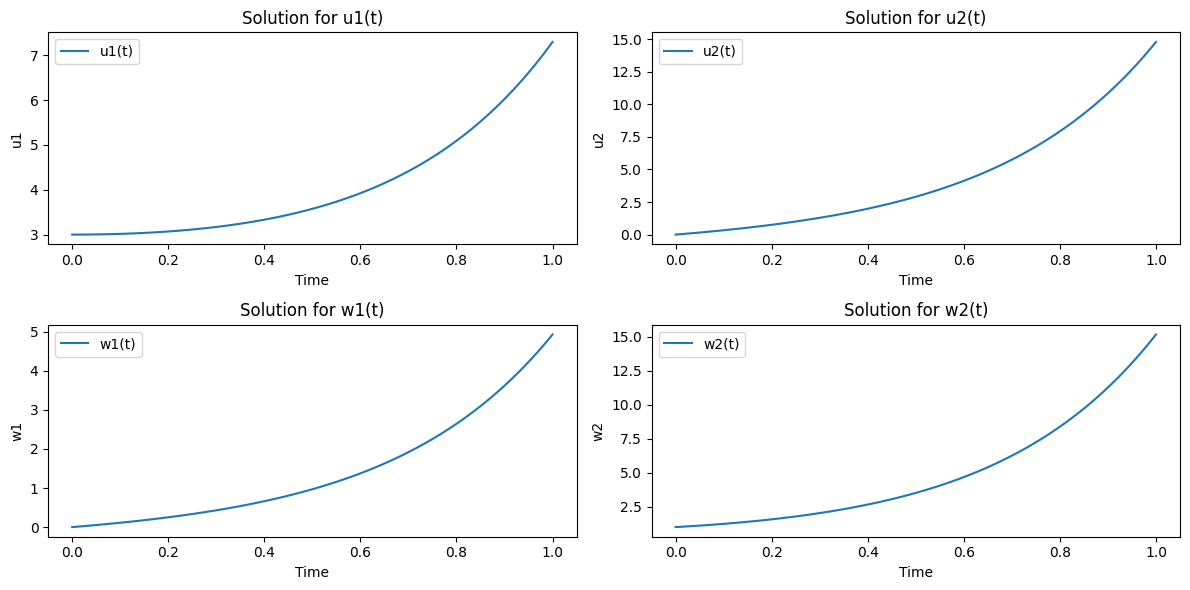

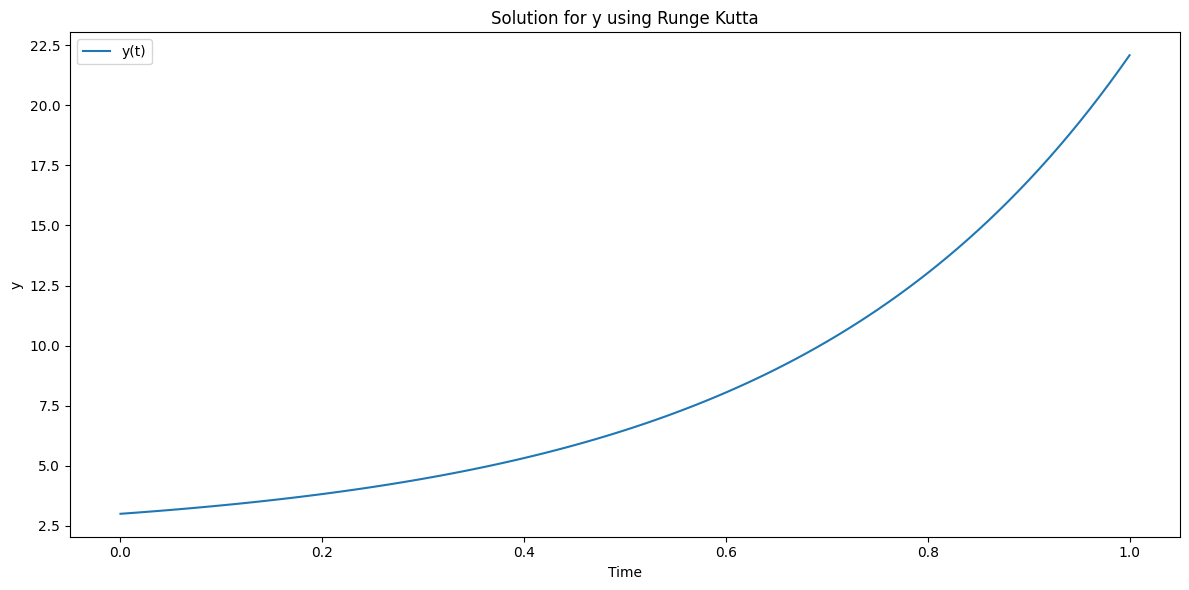

In [8]:
# Parámetros específicos del problema
u0 = [3, 0]
w0 = [0, 1]
t_span = [0, 1]
h = 0.01
y_b = np.exp(3) + 2

# Resolver los sistemas
t, u_solution, w_solution, yr_s = solve_systems(system1, system2, u0, w0, t_span, h, y_b)

# Graficar los resultados
plot_results(t, u_solution, w_solution, yr_s)


# Ejemplo 3

El siguiente programa funciona para cuales quiera $p(t), q(t), r(t)$.

Aproxime la solución del siguiente problema de valor en la frontera
$$
\begin{align*}
    &y''=-\frac{2}{t}y'+\frac{2}{t^2}y-\frac{sin(ln(t))}{t^2}, 1\leq t \leq 2 \\ 
    &y(1)=1, \\ 
    &y(2)= 2
\end{align*}
$$
Considere $h=0.1$

In [9]:
# Parámetros específicos del problema
a = 1
b = 2
y_a = 1
y_b = 2
u0 = [y_a, 0]
w0 = [0, 1]
t_span = [a, b]
h = 0.1


In [10]:
def p(t):
    return -2 / t

def q(t):
    return 2 / (t ** 2)

def r(t):
    return math.sin(np.log(t)) / (t ** 2)

def system1(u, t):
    u1, u2 = u
    return [u2, p(t) * u2 + q(t) * u1 + r(t)]

def system2(w, t):
    w1, w2 = w
    return [w2, p(t) * w2 + q(t) * w1]


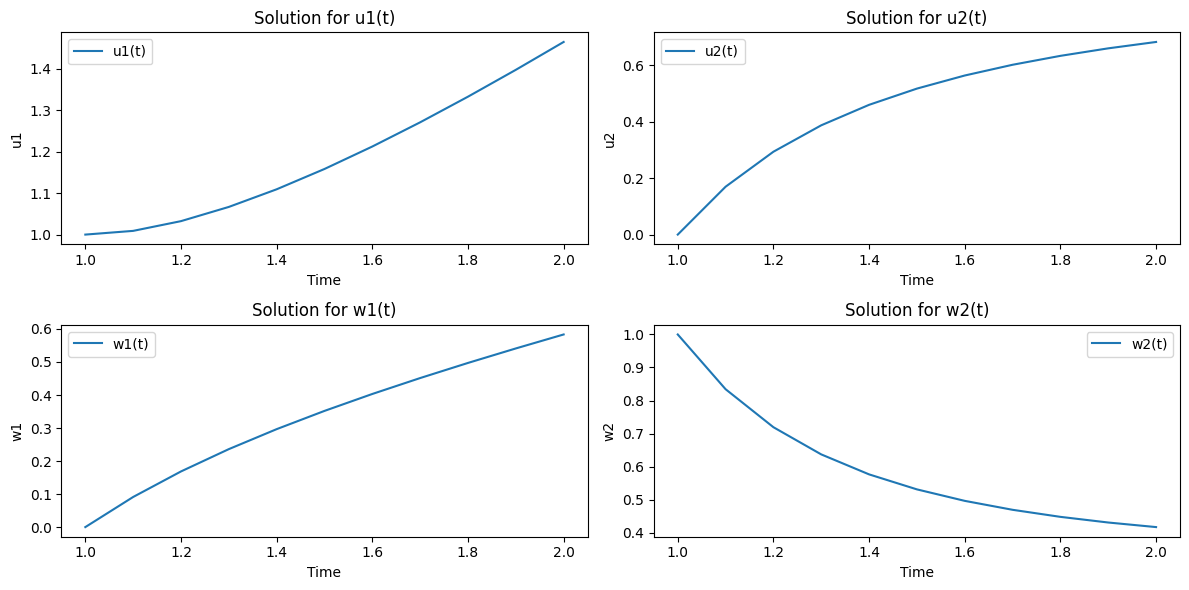

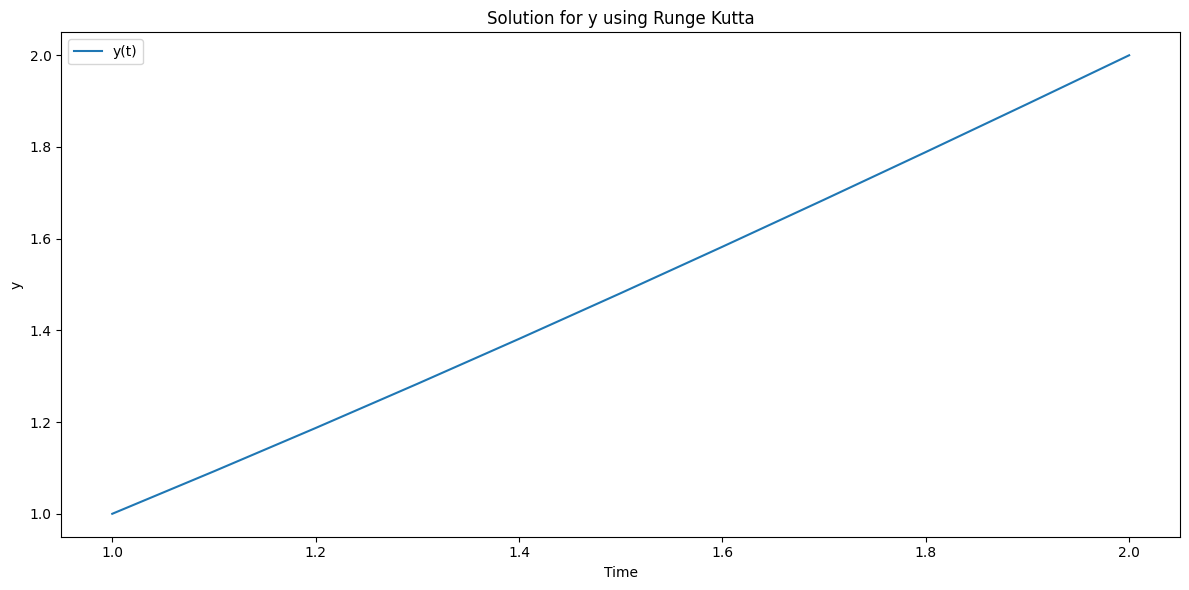

In [11]:

# Resolver los sistemas
t, u_solution, w_solution, yr_s = solve_systems(system1, system2, u0, w0, t_span, h, y_b)

# Graficar los resultados
plot_results(t, u_solution, w_solution, yr_s)


# Ejemplo 5

Seleccione $p(t)=2$, $q(t)=3$, $r(t)=-6$, $a=0, b=1$, $\alpha= 3$, $\beta= e^{3}+2$

In [12]:
# Parámetros específicos del problema
a = 0
b = 1
y_a = 3
y_b = np.exp(3)+2
u0 = [y_a, 0]
w0 = [0, 1]
t_span = [a, b]
h = 0.1

In [13]:
# Define las funciones P(t), q(t) y r(t)
def p(t):
    return 2

def q(t):
    return 3

def r(t):
    return -6

# Define los sistemas
def system1(u, t):
    u1, u2 = u
    return [u2, p(t)*u2 + q(t)*u1+r(t)]

def system2(w, t):
    w1, w2 = w
    return [w2, p(t)*w2 + q(t)*w1]

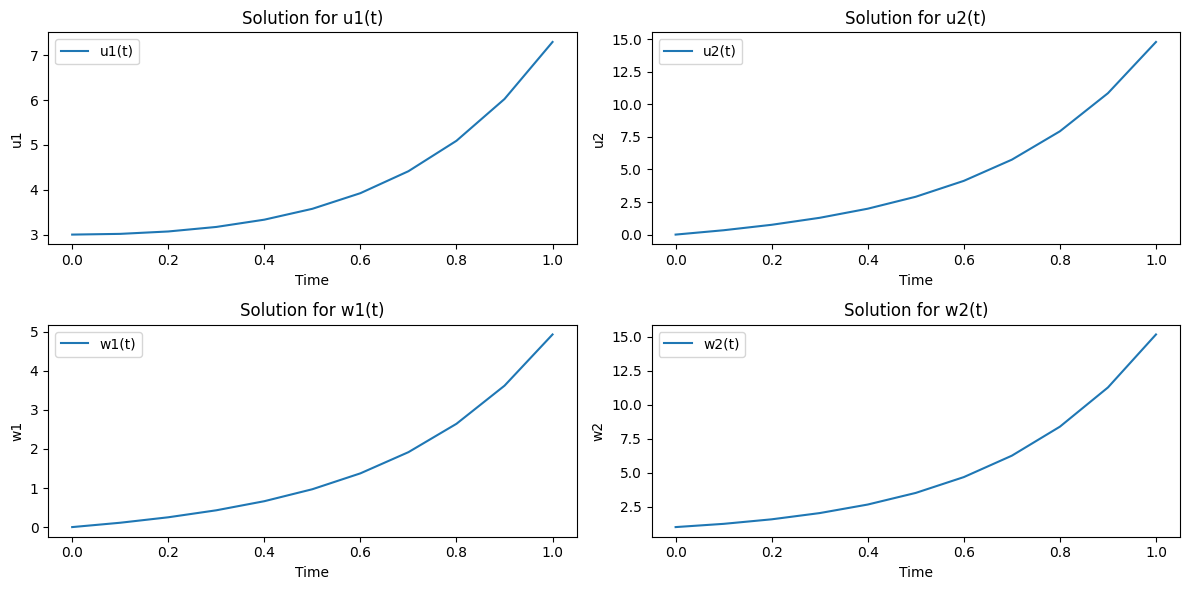

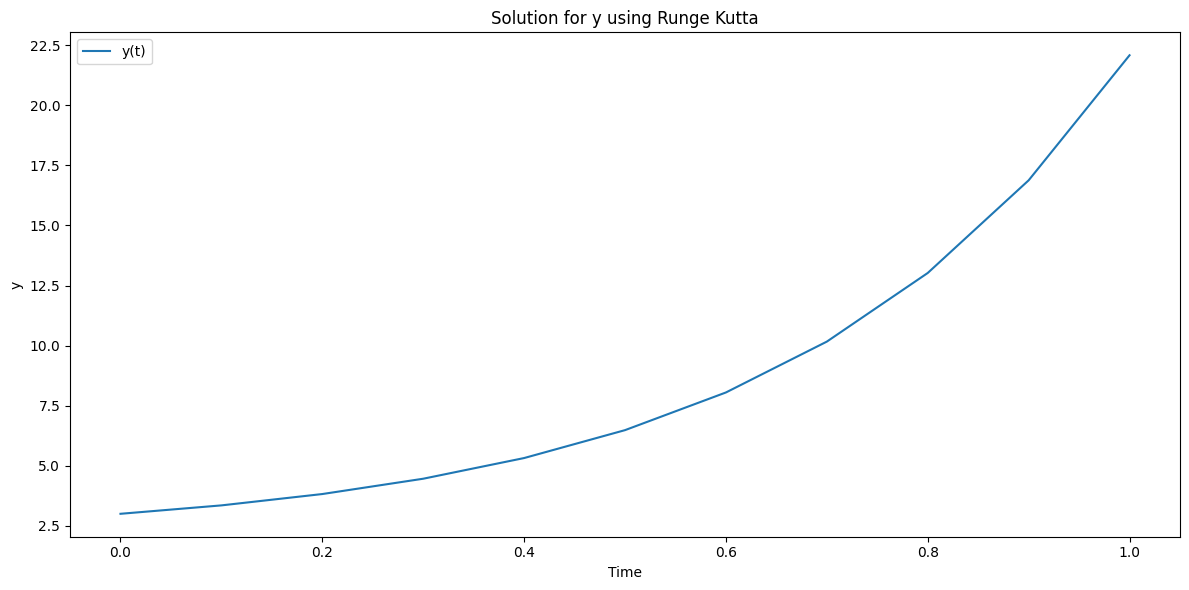

In [14]:
# Resolver los sistemas
t, u_solution, w_solution, yr_s = solve_systems(system1, system2, u0, w0, t_span, h, y_b)

# Graficar los resultados
plot_results(t, u_solution, w_solution, yr_s)

# Conclusión

El método de disparo lineal es  una de las maneras en las que podemos resolver problemas de valor de frontera en ecuaciones diferenciales de segundo orden al convertirlos en problemas de valor inicial más fáciles de manejar mediante un parámetro de ajuste. Este enfoque es versátil y se aplica en campos como la ingeniería, la física y la biología, permitiendo soluciones precisas y eficaces. Generalmente, el método de disparo lineal se implementa junto con el método de Euler o Runge-Kutta, especialmente su variante de cuarto orden, conocida por su alta exactitud al realizar múltiples estimaciones en cada intervalo. Esto contrasta con el método de Euler, que es más sencillo y computacionalmente eficiente, adecuado para problemas más simples o cuando la rapidez de ejecución es esencial.